Attempts to reproduce results in 10.1186/s13662-021-03597-1.

In [1]:
from copy import deepcopy
from matplotlib import pyplot as plt
import os
from tqdm.notebook import tqdm

from sde_models import Tesfaye2021
import sde

store_ssr_data = True
load_ssr_data = False

fig_kwargs = dict(
    layout='compressed',
    figsize=(15.0, 3.0)
)
plot_all_kwargs = dict(
    color='gray',
    alpha=0.1
)
fig_compare_kwargs = dict(
    layout='compressed', 
    figsize=(8.0, 4.0)
)

t_fin = 12.0
dt = 0.01  # Not reported
sample_size = 10
tested_sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
confidence = 0.95

def initial_values(**kwargs):
    result = {'S': 50.0,
              'V': 35.0,
              'I': 20.0,
              'T': 15.0,
              'R': 10.0}
    result.update(kwargs)
    return result

num_steps = int(t_fin / dt)
results_dir = os.path.join('results', Tesfaye2021.name)
if sde.get_pool() is None:
    _ = sde.start_pool()

Implementing corrections here.

Parameters for intensity of white noise were not reported. 

In [2]:
Tesfaye2021.parameter_defaults.update({
    'beta1': 0.1,
    'beta2': 0.1,
    'beta3': 0.1,
    'beta4': 0.1,
    'beta5': 0.1
})

Attempting to reproduce Figure 2

Deterministic results in Figure 2 are only reproduced qualitatively. There are clear quantitative differences, including 

* Final value of $I$ here is higher than in published results. 
* Final value of $R$ here is lower than in published results. 

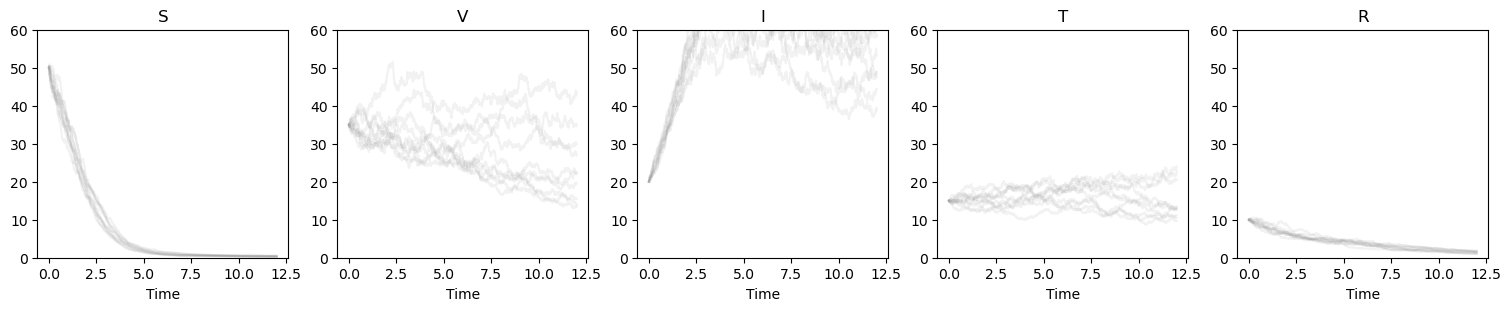

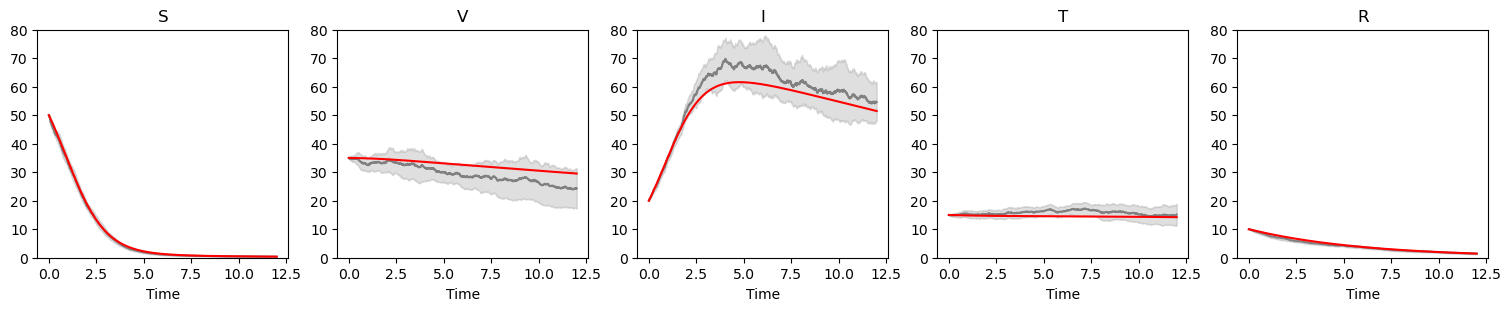

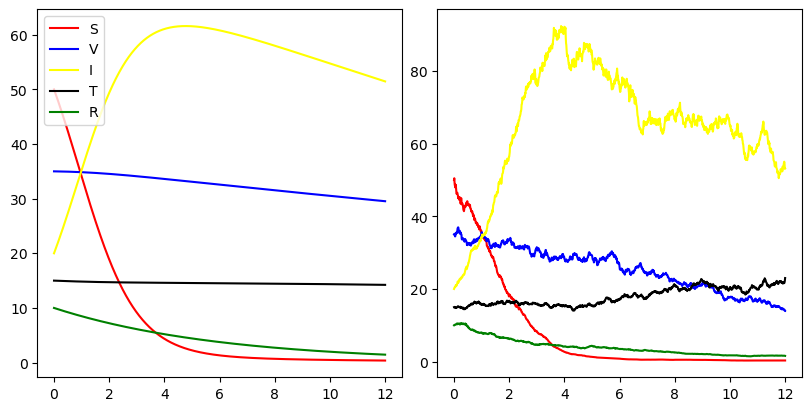

In [3]:
initial_values_fig_2 = initial_values()
parameters_fig_2 = deepcopy(Tesfaye2021.parameter_defaults)

results_fig_2 = sde.execute_sample(sample_size,
                                   Tesfaye2021(),
                                   num_steps,
                                   dt,
                                   initial_values_fig_2,
                                   parameters_fig_2)
fig, axs = results_fig_2.plot(fig_kwargs=fig_kwargs, plot_all_kwargs=plot_all_kwargs)
[ax.set_ylim(0, 60) for ax in axs]
fig, axs = results_fig_2.plot_ci(confidence, fig_kwargs=fig_kwargs, plot_all_kwargs=dict(color=plot_all_kwargs['color'], alpha=0.25))
results_fig_2.plot_mean(fig_axs=(fig, axs), plot_all_kwargs=dict(color=plot_all_kwargs['color']))
[ax.set_ylim(0, 80) for ax in axs]

parameters_fig_2_det = deepcopy(parameters_fig_2)
parameters_fig_2_det.update({
    'beta1': 0.0,
    'beta2': 0.0,
    'beta3': 0.0,
    'beta4': 0.0,
    'beta5': 0.0
})
results_fig_2_det = sde.SDESimulation(Tesfaye2021(),
                                      num_steps,
                                      dt,
                                      initial_values_fig_2,
                                      parameters_fig_2_det).run()
for i, name in enumerate(Tesfaye2021.variable_names):
    axs[i].plot(results_fig_2_det.time,
                results_fig_2_det.data[i, :],
                color='red')

fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)
plot_colors_fig_2 = ('red', 'blue', 'yellow', 'black', 'green')
for i, name in enumerate(Tesfaye2021.variable_names):
    axs[0].plot(results_fig_2_det.time,
                results_fig_2_det.data[i, :],
                color=plot_colors_fig_2[i],
                label=name)
    axs[1].plot(results_fig_2[0].time,
                results_fig_2[0].data[i, :],
                color=plot_colors_fig_2[i],
                label=name)
_ = axs[0].legend()

Attempting to reproduce Figure 3

Deterministic results in Figure 3 are only reproduced qualitatively. There are clear quantitative differences, including 

* Final value of $I$ here is higher than in published results for $\alpha$ values of 0.05 and 0.0143. 

  0%|          | 0/3 [00:00<?, ?it/s]

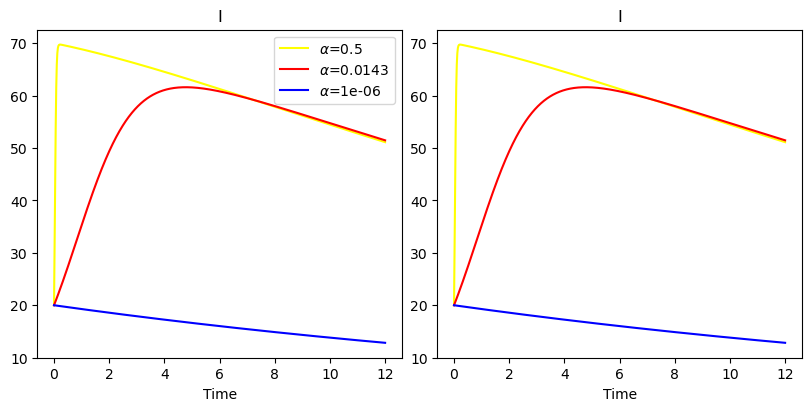

In [4]:
plot_colors_fig_3 = ['yellow', 'red', 'blue']
initial_values_fig_3 = initial_values()
alpha_test = [0.5, 0.0143, 0.000001]
parameters_fig_3 = {a: deepcopy(Tesfaye2021.parameter_defaults) for a in alpha_test}
for a in alpha_test:
    parameters_fig_3[a]['alpha'] = a
parameters_fig_3_det = deepcopy(parameters_fig_3)
for v in parameters_fig_3_det.values():
    for name in ['beta1', 'beta2', 'beta3', 'beta4', 'beta5']:
        v[name] = 0.0

results_fig_3 = {}
results_fig_3_det = {}
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)

for i, a in tqdm(enumerate(alpha_test), total=len(alpha_test), leave=False):
    results_fig_3[a] = sde.SDESimulation(Tesfaye2021(),
                                         num_steps,
                                         dt,
                                         initial_values_fig_3,
                                         parameters_fig_3[a]).run().extract('I')
    results_fig_3_det[a] = sde.SDESimulation(Tesfaye2021(),
                                             num_steps,
                                             dt,
                                             initial_values_fig_3,
                                             parameters_fig_3_det[a]).run().extract('I')
    results_fig_3_det[a].plot(fig_axs=(fig, [axs[0]]),
                              plot_all_kwargs=dict(color=plot_colors_fig_3[i],
                                                   label=f'$\\alpha$={a}'))
    results_fig_3_det[a].plot(fig_axs=(fig, [axs[1]]),
                              plot_all_kwargs=dict(color=plot_colors_fig_3[i],
                                                   label=f'$\\alpha$={a}'))
_ = axs[0].legend()

Attempting to reproduce Figure 4

Deterministic results in Figure 4 are only reproduced qualitatively. There are clear quantitative differences, including 

* Final value of $I$ here is higher than in published results for a $\delta$ value of 0.04. 

  0%|          | 0/3 [00:00<?, ?it/s]

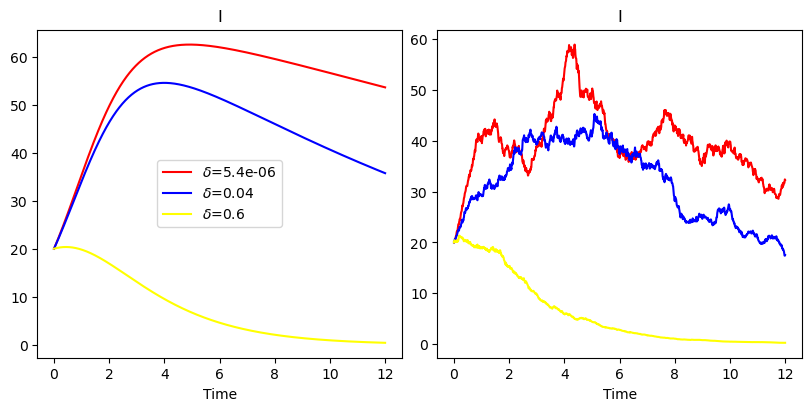

In [5]:
plot_colors_fig_4 = ['red', 'blue', 'yellow']
initial_values_fig_4 = initial_values()
delta_test = [0.0000054, 0.04, 0.6]
parameters_fig_4 = {d: deepcopy(Tesfaye2021.parameter_defaults) for d in delta_test}
for d in delta_test:
    parameters_fig_4[d]['delta'] = d
parameters_fig_4_det = deepcopy(parameters_fig_4)
for v in parameters_fig_4_det.values():
    for name in ['beta1', 'beta2', 'beta3', 'beta4', 'beta5']:
        v[name] = 0.0

results_fig_4 = {}
results_fig_4_det = {}
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)
for i, a in tqdm(enumerate(delta_test), total=len(delta_test), leave=False):
    results_fig_4[a] = sde.SDESimulation(Tesfaye2021(),
                                         num_steps,
                                         dt,
                                         initial_values_fig_4,
                                         parameters_fig_4[a]).run().extract('I')
    results_fig_4_det[a] = sde.SDESimulation(Tesfaye2021(),
                                             num_steps,
                                             dt,
                                             initial_values_fig_4,
                                             parameters_fig_4_det[a]).run().extract('I')
    results_fig_4_det[a].plot(fig_axs=(fig, [axs[0]]),
                              plot_all_kwargs=dict(color=plot_colors_fig_4[i],
                                                   label=f'$\\delta$={a}'))
    results_fig_4[a].plot(fig_axs=(fig, [axs[1]]),
                          plot_all_kwargs=dict(color=plot_colors_fig_4[i],
                                               label=f'$\\delta$={a}'))
_ = axs[0].legend()

Attempting to reproduce Figure 5

Deterministic results in Figure 5 are not reproduced qualitatively. All values of $\rho$ here produce decreasing trajectories of $R$. 

  0%|          | 0/3 [00:00<?, ?it/s]

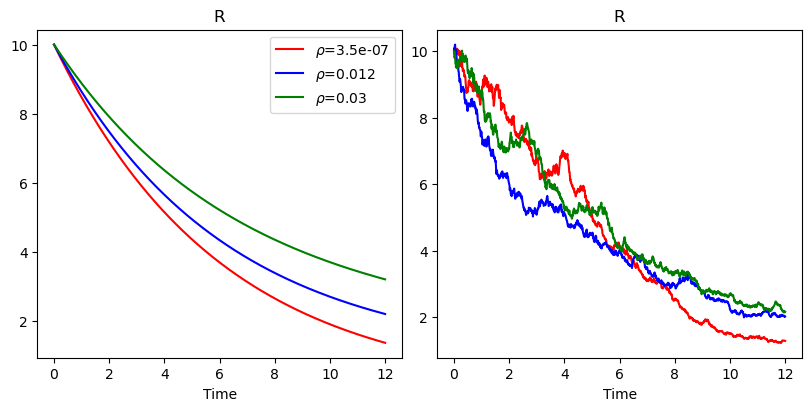

In [6]:
plot_colors_fig_5 = ['red', 'blue', 'green']
initial_values_fig_5 = initial_values()
rho_test = [0.00000035, 0.012, 0.03]
parameters_fig_5 = {r: deepcopy(Tesfaye2021.parameter_defaults) for r in rho_test}
for r in rho_test:
    parameters_fig_5[r]['rho'] = r
parameters_fig_5_det = deepcopy(parameters_fig_5)
for v in parameters_fig_5_det.values():
    for name in ['beta1', 'beta2', 'beta3', 'beta4', 'beta5']:
        v[name] = 0.0

results_fig_5 = {}
results_fig_5_det = {}
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)
for i, a in tqdm(enumerate(rho_test), total=len(rho_test), leave=False):
    results_fig_5[a] = sde.SDESimulation(Tesfaye2021(),
                                         num_steps,
                                         dt,
                                         initial_values_fig_5,
                                         parameters_fig_5[a]).run().extract('R')
    results_fig_5_det[a] = sde.SDESimulation(Tesfaye2021(),
                                             num_steps,
                                             dt,
                                             initial_values_fig_5,
                                             parameters_fig_5_det[a]).run().extract('R')
    results_fig_5_det[a].plot(fig_axs=(fig, [axs[0]]),
                              plot_all_kwargs=dict(color=plot_colors_fig_5[i],
                                                   label=f'$\\rho$={a}'))
    results_fig_5[a].plot(fig_axs=(fig, [axs[1]]),
                          plot_all_kwargs=dict(color=plot_colors_fig_5[i],
                                               label=f'$\\rho$={a}'))
_ = axs[0].legend()

Quantify reproducibility of Figure 2.

Figure 2 EFECT Error (mean +- st. dev)
Sample size 10: 1.2016588679832725 +- 0.15925135248038094
Sample size 50: 0.6381813616789159 +- 0.06846862216043567
Sample size 100: 0.4723149536493852 +- 0.040086752818153146
Sample size 500: 0.22282848856550783 +- 0.013934391239733503
Sample size 1000: 0.15822109890458114 +- 0.009167192294067828
Sample size 5000: 0.0717731677565026 +- 0.003678534266601789
Sample size 10000: 0.05080044105532701 +- 0.00259294556548854


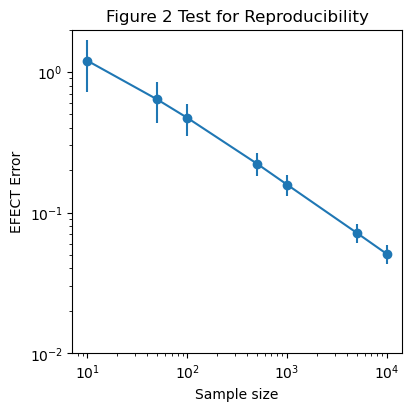

In [7]:
prefix_fig_2 = 'results_fig_2'

if load_ssr_data:
    md_data, res_data = sde.load_ssr_dataset(results_dir, prefix_fig_2)[:2]
    ssr_metadata_fig_2 = {}
    ssr_results_fig_2 = {}
    for i in range(len(md_data)):
        ssr_metadata_fig_2[md_data[i].sample_size] = md_data[i]
        ssr_results_fig_2[md_data[i].sample_size] = res_data[i]
else:
    ssr_metadata_fig_2, ssr_results_fig_2 = sde.generate_ssr_dataset(
        Tesfaye2021(),
        tested_sample_sizes,
        num_steps,
        dt,
        initial_values_fig_2,
        parameters_fig_2,
        prefix_fig_2,
        results_dir=results_dir if store_ssr_data else None
    )

fig, ax = sde.plot_repro(ssr_metadata_fig_2)
ax.set_title('Figure 2 Test for Reproducibility')

print('Figure 2 EFECT Error (mean +- st. dev)')
for sz, md in ssr_metadata_fig_2.items():
    print(f'Sample size {sz}: {md.ks_stat_mean} +- {md.ks_stat_stdev}')

Quantify reproducibility of Figure 3.

Figure 3 EFECT Error (mean +- st. dev)
alpha: 0.5
	Sample size 10: 1.4681739805257537 +- 0.09070918773185008
	Sample size 50: 0.6973210558864028 +- 0.04517138765755291
	Sample size 100: 0.4956947190972174 +- 0.029891273466139567
	Sample size 500: 0.22655797593111604 +- 0.012156135094510778
	Sample size 1000: 0.16012255473852904 +- 0.008852402965439071
	Sample size 5000: 0.07249674295631985 +- 0.0036570391526748267
	Sample size 10000: 0.05066427577857238 +- 0.0024934124409453635
alpha: 0.0143
	Sample size 10: 1.4959588695159098 +- 0.05815072875081593
	Sample size 50: 0.7086013118004567 +- 0.03489403849249226
	Sample size 100: 0.5073294217067573 +- 0.025374825558272387
	Sample size 500: 0.22595472328093044 +- 0.011933539888135372
	Sample size 1000: 0.1603076681850284 +- 0.008561763542134261
	Sample size 5000: 0.07174641586279025 +- 0.0033551409491172223
	Sample size 10000: 0.05078267323817661 +- 0.002519761502219073
alpha: 1e-06
	Sample size 10: 1.4958632595589907 +- 0.06157275535470838


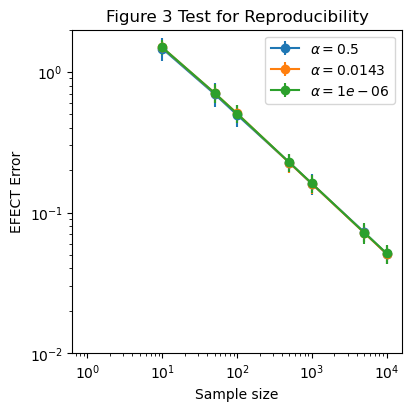

In [8]:
prefix_fig_3 = 'results_fig_3'
pname_fig_3 = 'alpha'

ssr_metadata_fig_3 = {}
ssr_results_fig_3 = {}

if load_ssr_data:
    md_data, res_data, iv_data, p_data, _ = sde.load_ssr_dataset(results_dir, prefix_fig_3)
    for i in range(len(md_data)):
        v = p_data[i][pname_fig_3]
        if v not in ssr_metadata_fig_3:
            ssr_metadata_fig_3[v] = {}
            ssr_results_fig_3[v] = {}
        ssr_metadata_fig_3[v][md_data[i].sample_size] = md_data[i]
        ssr_results_fig_3[v][md_data[i].sample_size] = res_data[i]

else:
    for i, v in tqdm(enumerate(results_fig_3.keys()), total=len(results_fig_3.keys()), leave=False):
        ssr_metadata_fig_3[v], ssr_results_fig_3[v] = sde.generate_ssr_dataset(
            Tesfaye2021(),
            tested_sample_sizes,
            num_steps,
            dt,
            initial_values_fig_3, 
            parameters_fig_3[v], 
            prefix_fig_3 + f'_{i}',
            results_dir=results_dir if store_ssr_data else None
        )

fig_ax = None
for v, md in ssr_metadata_fig_3.items():
    fig_ax = sde.plot_repro(md, fig_ax=fig_ax, plot_kwargs=dict(label=f'$\\{pname_fig_3}={v}$'))
fig_ax[1].set_title('Figure 3 Test for Reproducibility')
fig_ax[1].legend()

print('Figure 3 EFECT Error (mean +- st. dev)')
for v in ssr_metadata_fig_3.keys():
    print(f'{pname_fig_3}: {v}')
    for sz, md in ssr_metadata_fig_3[v].items():
        print(f'\tSample size {sz}: {md.ks_stat_mean} +- {md.ks_stat_stdev}')

Quantify reproducibility of Figure 4. 

Figure 4 EFECT Error (mean +- st. dev)
delta: 5.4e-06
	Sample size 10: 1.4901743881860803 +- 0.054874290330357234
	Sample size 50: 0.7106093242055757 +- 0.03248055617711576
	Sample size 100: 0.5049579023589353 +- 0.024266301618660734
	Sample size 500: 0.22633705140442334 +- 0.009813478106723662
	Sample size 1000: 0.1610431466711788 +- 0.008738150702976387
	Sample size 5000: 0.07172368351432688 +- 0.003370297440118599
	Sample size 10000: 0.05074507401409121 +- 0.0027261997544542663
delta: 0.04
	Sample size 10: 1.4935237094539284 +- 0.06048762422699526
	Sample size 50: 0.7094863889801905 +- 0.03283060517660433
	Sample size 100: 0.5057994103764429 +- 0.026519803987185245
	Sample size 500: 0.2271129216194879 +- 0.010614784649349516
	Sample size 1000: 0.16100723038505327 +- 0.007806673366231034
	Sample size 5000: 0.0718255697128525 +- 0.003521255218044764
	Sample size 10000: 0.05107532854704751 +- 0.002656733817770938
delta: 0.6
	Sample size 10: 1.4917369692828664 +- 0.0579832276386981
	Sam

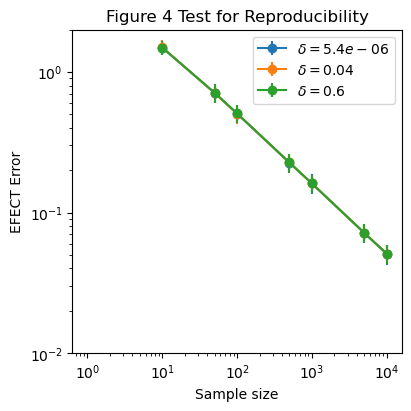

In [9]:
prefix_fig_4 = 'results_fig_4'
pname_fig_4 = 'delta'

ssr_metadata_fig_4 = {}
ssr_results_fig_4 = {}

if load_ssr_data:
    md_data, res_data, iv_data, p_data, _ = sde.load_ssr_dataset(results_dir, prefix_fig_4)
    for i in range(len(md_data)):
        v = p_data[i][pname_fig_4]
        if v not in ssr_metadata_fig_4:
            ssr_metadata_fig_4[v] = {}
            ssr_results_fig_4[v] = {}
        ssr_metadata_fig_4[v][md_data[i].sample_size] = md_data[i]
        ssr_results_fig_4[v][md_data[i].sample_size] = res_data[i]

else:
    for i, v in tqdm(enumerate(results_fig_4.keys()), total=len(results_fig_4.keys()), leave=False):
        ssr_metadata_fig_4[v], ssr_results_fig_4[v] = sde.generate_ssr_dataset(
            Tesfaye2021(),
            tested_sample_sizes,
            num_steps,
            dt,
            initial_values_fig_4, 
            parameters_fig_4[v], 
            prefix_fig_4 + f'_{i}',
            results_dir=results_dir if store_ssr_data else None
        )

fig_ax = None
for v, md in ssr_metadata_fig_4.items():
    fig_ax = sde.plot_repro(md, fig_ax=fig_ax, plot_kwargs=dict(label=f'$\\{pname_fig_4}={v}$'))
fig_ax[1].set_title('Figure 4 Test for Reproducibility')
fig_ax[1].legend()

print('Figure 4 EFECT Error (mean +- st. dev)')
for v in ssr_metadata_fig_4.keys():
    print(f'{pname_fig_4}: {v}')
    for sz, md in ssr_metadata_fig_4[v].items():
        print(f'\tSample size {sz}: {md.ks_stat_mean} +- {md.ks_stat_stdev}')

Quantify reproducibility of Figure 5. 

Figure 5 EFECT Error (mean +- st. dev)
rho: 3.5e-07
	Sample size 10: 1.4875106845918864 +- 0.05490083480009339
	Sample size 50: 0.7079325735023678 +- 0.034707685236112874
	Sample size 100: 0.5076680384676496 +- 0.027138227952409607
	Sample size 500: 0.22725309379266848 +- 0.011697011182487926
	Sample size 1000: 0.16040700563791366 +- 0.007855598480564174
	Sample size 5000: 0.07189810314116776 +- 0.0037870521027882475
	Sample size 10000: 0.051091404135348864 +- 0.0025853687959530684
rho: 0.012
	Sample size 10: 1.4953744540298088 +- 0.05564742130678332
	Sample size 50: 0.7101006704560942 +- 0.034138037877740036
	Sample size 100: 0.5065401635173178 +- 0.02609170299450066
	Sample size 500: 0.228058051336777 +- 0.01169939951822692
	Sample size 1000: 0.16101667216595403 +- 0.008444543852721365
	Sample size 5000: 0.0720229441782424 +- 0.003896964436395815
	Sample size 10000: 0.05109218330713385 +- 0.0027145020960277406
rho: 0.03
	Sample size 10: 1.497355372392786 +- 0.06097801296333651
	Sampl

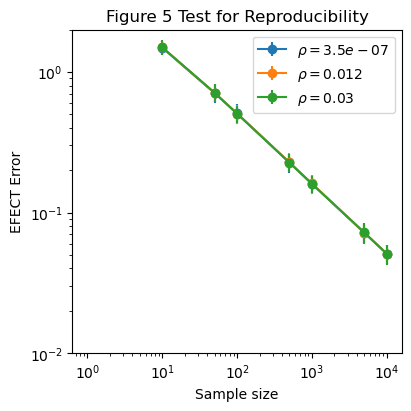

In [10]:
prefix_fig_5 = 'results_fig_5'
pname_fig_5 = 'rho'

ssr_metadata_fig_5 = {}
ssr_results_fig_5 = {}

if load_ssr_data:
    md_data, res_data, iv_data, p_data, _ = sde.load_ssr_dataset(results_dir, prefix_fig_5)
    for i in range(len(md_data)):
        v = p_data[i][pname_fig_5]
        if v not in ssr_metadata_fig_5:
            ssr_metadata_fig_5[v] = {}
            ssr_results_fig_5[v] = {}
        ssr_metadata_fig_5[v][md_data[i].sample_size] = md_data[i]
        ssr_results_fig_5[v][md_data[i].sample_size] = res_data[i]

else:
    for i, v in tqdm(enumerate(results_fig_5.keys()), total=len(results_fig_5.keys()), leave=False):
        ssr_metadata_fig_5[v], ssr_results_fig_5[v] = sde.generate_ssr_dataset(
            Tesfaye2021(),
            tested_sample_sizes,
            num_steps,
            dt,
            initial_values_fig_5, 
            parameters_fig_5[v], 
            prefix_fig_5 + f'_{i}',
            results_dir=results_dir if store_ssr_data else None
        )

fig_ax = None
for v, md in ssr_metadata_fig_5.items():
    fig_ax = sde.plot_repro(md, fig_ax=fig_ax, plot_kwargs=dict(label=f'$\\{pname_fig_5}={v}$'))
fig_ax[1].set_title('Figure 5 Test for Reproducibility')
fig_ax[1].legend()

print('Figure 5 EFECT Error (mean +- st. dev)')
for v in ssr_metadata_fig_5.keys():
    print(f'{pname_fig_5}: {v}')
    for sz, md in ssr_metadata_fig_5[v].items():
        print(f'\tSample size {sz}: {md.ks_stat_mean} +- {md.ks_stat_stdev}')

Show reproducible results for Figure 2.

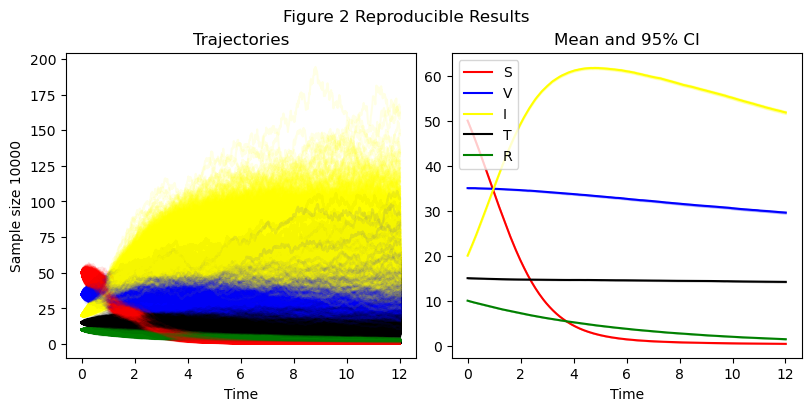

In [11]:
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)

ssr_results_fig_2_sz = max(ssr_results_fig_2.keys())

r: sde.SDEResultSample = ssr_results_fig_2[ssr_results_fig_2_sz]
r.plot(fig_axs=(fig, [axs[0]] * len(Tesfaye2021.variable_names)),
       plot_all_kwargs=dict(alpha=0.1),
       plot_kwargs={n: dict(color=plot_colors_fig_2[i % len(plot_colors_fig_2)]) 
                    for i, n in enumerate(Tesfaye2021.variable_names)})

r.plot_ci(confidence, fig_axs=(fig, [axs[1]] * len(Tesfaye2021.variable_names)),
            plot_all_kwargs=dict(alpha=0.25),
            plot_kwargs={n: dict(color=plot_colors_fig_2[i % len(plot_colors_fig_2)]) 
                         for i, n in enumerate(Tesfaye2021.variable_names)})
r.plot_mean(fig_axs=(fig, [axs[1]] * len(Tesfaye2021.variable_names)),
            plot_kwargs={n: dict(color=plot_colors_fig_2[i % len(plot_colors_fig_2)], label=n) 
                         for i, n in enumerate(Tesfaye2021.variable_names)})

fig.suptitle('Figure 2 Reproducible Results')
axs[0].set_title('Trajectories')
axs[1].set_title(f'Mean and {int(confidence * 100)}% CI')
axs[0].set_ylabel(f'Sample size {ssr_results_fig_2_sz}')
_ = axs[1].legend()

Show reproducible results for Figure 3.

  0%|          | 0/3 [00:00<?, ?it/s]

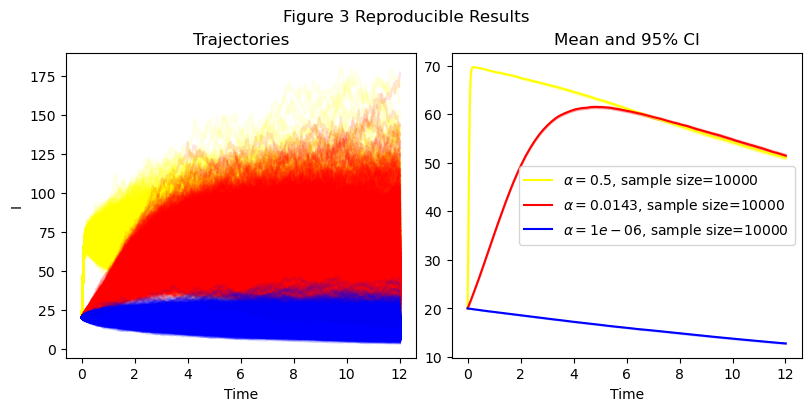

In [12]:
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)
ssr_results_fig_3_sz = []

for i, val in tqdm(enumerate(ssr_results_fig_3.keys()), total=len(ssr_results_fig_3.keys()), leave=False):
    
    res_val = ssr_results_fig_3[val]
    res_val_sz = max(res_val.keys())
    ssr_results_fig_3_sz.append(res_val_sz)

    r: sde.SDEResultSample = res_val[res_val_sz].extract('I')
    r.plot(fig_axs=(fig, [axs[0]]),
           plot_all_kwargs=dict(alpha=0.1, 
                                color=plot_colors_fig_3[i % len(plot_colors_fig_3)]))
    
    r.plot_ci(confidence, fig_axs=(fig, [axs[1]]),
              plot_all_kwargs=dict(alpha=0.25, 
                                   color=plot_colors_fig_3[i % len(plot_colors_fig_3)]))
    r.plot_mean(fig_axs=(fig, [axs[1]]),
                plot_all_kwargs=dict(color=plot_colors_fig_3[i % len(plot_colors_fig_3)], 
                                     label=f'$\\{pname_fig_3}={val}$, sample size={res_val_sz}'))

fig.suptitle('Figure 3 Reproducible Results')
axs[0].set_title('Trajectories')
axs[0].set_ylabel('I')
axs[1].set_title(f'Mean and {int(confidence * 100)}% CI')
_ = axs[1].legend()

Show reproducible results for Figure 4.

  0%|          | 0/3 [00:00<?, ?it/s]

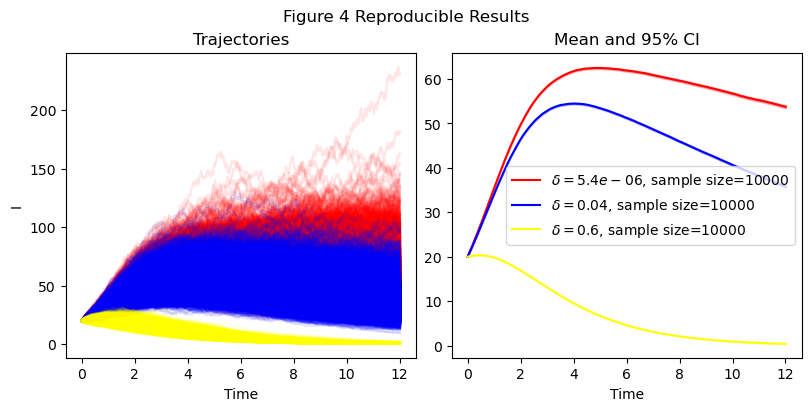

In [13]:
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)
ssr_results_fig_4_sz = []

for i, val in tqdm(enumerate(ssr_results_fig_4.keys()), total=len(ssr_results_fig_4.keys()), leave=False):
    
    res_val = ssr_results_fig_4[val]
    res_val_sz = max(res_val.keys())
    ssr_results_fig_4_sz.append(res_val_sz)

    r: sde.SDEResultSample = res_val[res_val_sz].extract('I')
    r.plot(fig_axs=(fig, [axs[0]]),
           plot_all_kwargs=dict(alpha=0.1, 
                                color=plot_colors_fig_4[i % len(plot_colors_fig_4)]))
    
    r.plot_ci(confidence, fig_axs=(fig, [axs[1]]),
              plot_all_kwargs=dict(alpha=0.25, 
                                   color=plot_colors_fig_4[i % len(plot_colors_fig_4)]))
    r.plot_mean(fig_axs=(fig, [axs[1]]),
                plot_all_kwargs=dict(color=plot_colors_fig_4[i % len(plot_colors_fig_4)], 
                                     label=f'$\\{pname_fig_4}={val}$, sample size={res_val_sz}'))

fig.suptitle('Figure 4 Reproducible Results')
axs[0].set_title('Trajectories')
axs[0].set_ylabel('I')
axs[1].set_title(f'Mean and {int(confidence * 100)}% CI')
_ = axs[1].legend()

Show reproducible results for Figure 5.

  0%|          | 0/3 [00:00<?, ?it/s]

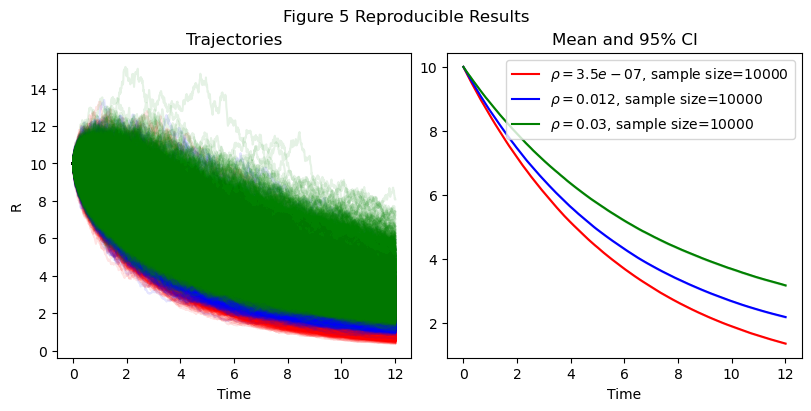

In [14]:
fig, axs = plt.subplots(1, 2, **fig_compare_kwargs)
ssr_results_fig_5_sz = []

for i, val in tqdm(enumerate(ssr_results_fig_5.keys()), total=len(ssr_results_fig_5.keys()), leave=False):
    
    res_val = ssr_results_fig_5[val]
    res_val_sz = max(res_val.keys())
    ssr_results_fig_5_sz.append(res_val_sz)

    r: sde.SDEResultSample = res_val[res_val_sz].extract('R')
    r.plot(fig_axs=(fig, [axs[0]]),
           plot_all_kwargs=dict(alpha=0.1, 
                                color=plot_colors_fig_5[i % len(plot_colors_fig_5)]))
    
    r.plot_ci(confidence, fig_axs=(fig, [axs[1]]),
              plot_all_kwargs=dict(alpha=0.25, 
                                   color=plot_colors_fig_5[i % len(plot_colors_fig_5)]))
    r.plot_mean(fig_axs=(fig, [axs[1]]),
                plot_all_kwargs=dict(color=plot_colors_fig_5[i % len(plot_colors_fig_5)], 
                                     label=f'$\\{pname_fig_5}={val}$, sample size={res_val_sz}'))

fig.suptitle('Figure 5 Reproducible Results')
axs[0].set_title('Trajectories')
axs[0].set_ylabel('R')
axs[1].set_title(f'Mean and {int(confidence * 100)}% CI')
_ = axs[1].legend()